In [1]:
##1) Importing the necessary libraries
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import lightgbm as lgb

# Preprocessing librariess
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [14]:
## 2) Load the dataset
df = pd.read_csv(r"C:\Users\nithi\Downloads\archive (4)\data\dataset.csv")
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [ ]:
## 3) Exploratory Data Analysis(EDA)

In [15]:
# display metadata about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [16]:
# display the first 5 rows of the dataset
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [17]:
#display the last 5 rows of the dataset
df.tail()

Unnamed: 0                track_id           artists  \
113995      113995  2C3TZjDRiAzdyViavDJ217     Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw     Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX     Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs  Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5     Cesária Evora   

                                               album_name  \
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                 track_name  popularity  duration_ms  explicit  danceability  \
113995  Sleep My Little Boy          21       384999     False         0.172   
113996     Water Into Light          22       385000     False         0.174   
113997       Miss Perfumado          22       271466     False         0.629   
113998              Friends          41       283893     False         0.587   
113999            Barbincor          22       241826     False         0.526   

        energy  ...  loudness  mode  speechiness  acousticness  \
113995   0.235  ...   -16.393     1       0.0422         0.640   
113996   0.117  ...   -18.318     0       0.0401         0.994   
113997   0.329  ...   -10.895     0       0.0420         0.867   
113998   0.506  ...   -10.889     1       0.0297         0.381   
113999   0.487  ...   -10.204     0       0.0725         0.681   

        instrumentalness  liveness  valence    tempo  time_signature  \
113995             0.928    0.0863   0.0339  125.995               5   
113996             0.976    0.1050   0.0350   85.239               4   
113997             0.000    0.0839   0.7430  132.378               4   
113998             0.000    0.2700   0.4130  135.960               4   
113999             0.000    0.0893   0.7080   79.198               4   

        track_genre  
113995  world-music  
113996  world-music  
113997  world-music  
113998  world-music  
113999  world-music  

[5 rows x 21 columns]

In [18]:
#describe summary statistics for all numeric columns
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

In [19]:
#display dataset shape
df.shape

(114000, 21)

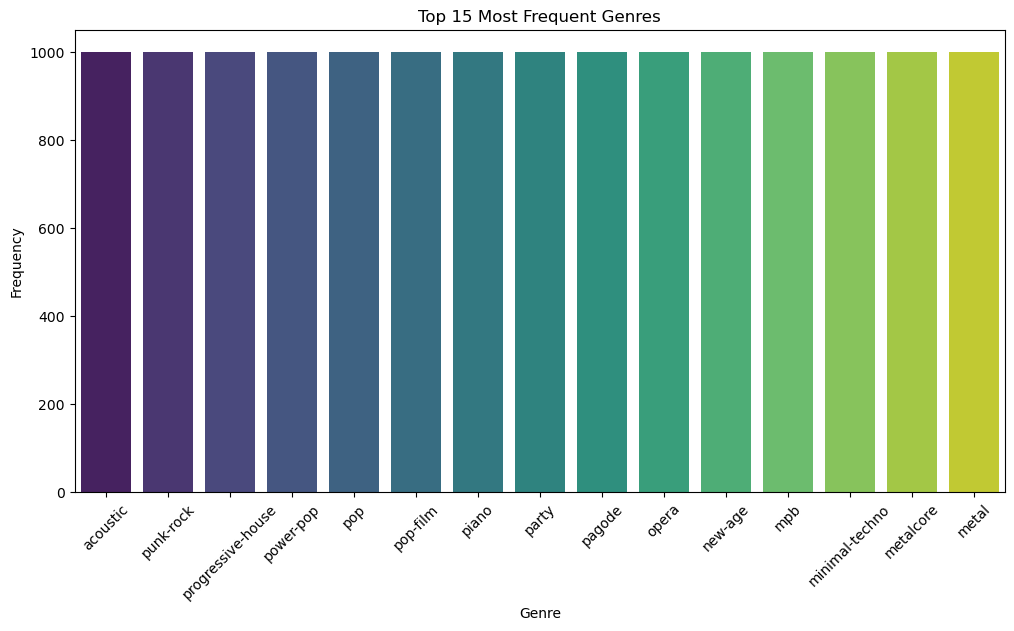

In [20]:
# Top 15 genres by frequency
top_genres = df['track_genre'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title("Top 15 Most Frequent Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

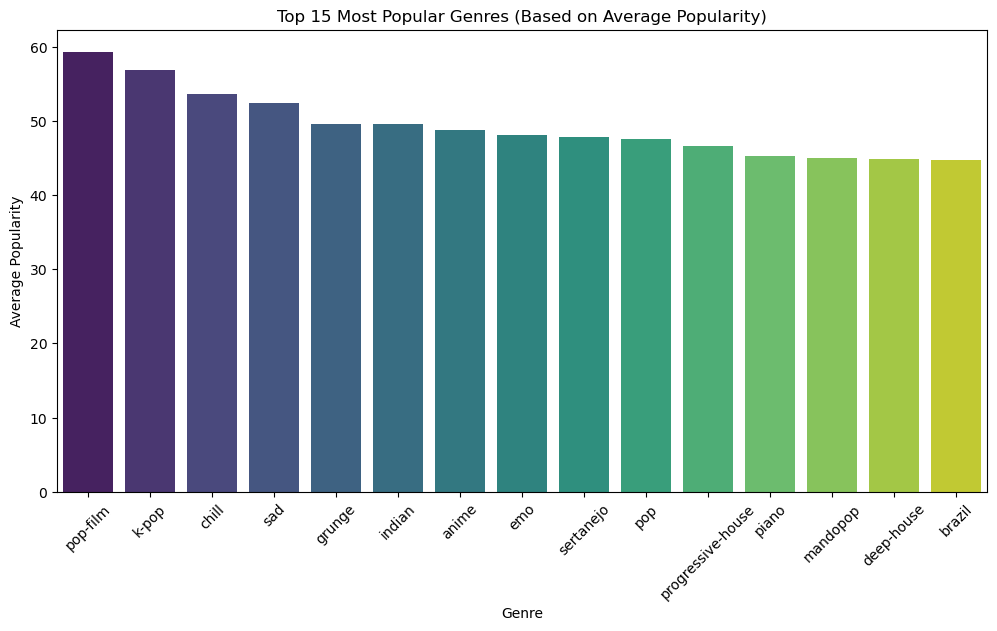

In [10]:
# Calculate the average popularity for each genre
top_15_popular_genres = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)

# Plot the top 15 most popular genres based on average popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_popular_genres.index, y=top_15_popular_genres.values, palette='viridis')
plt.title("Top 15 Most Popular Genres (Based on Average Popularity)")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Display missing values
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [22]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [23]:
#4) Data Preprocessing
# Fill missing values in 'artists', 'album_name', and 'track_name' with 'Unknown'
df['artists'].fillna('Unknown', inplace=True)
df['album_name'].fillna('Unknown', inplace=True)
df['track_name'].fillna('Unknown', inplace=True)

In [24]:
# Label encode the target variable
le = LabelEncoder()
df['track_genre'] = le.fit_transform(df['track_genre'])

In [25]:
# Drop the unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])

In [26]:
df.head()

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  track_genre  
0   87.917               4            0  
1   77.489               4            0  
2   76.332               4            0  
3  181.740               3            0  
4  119.949               4            0

In [27]:
##5) Feature Selection and Splitting Data
# Features (all columns except 'track_genre')
X = df.drop(columns=['track_genre'])

# Target variable
y = df['track_genre']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
##6) Model Development and Evaluation
#Random Forest Model
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.3256140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.20      0.21       213
           1       0.38      0.35      0.37       203
           2       0.03      0.03      0.03       215
           3       0.08      0.09      0.08       184
           4       0.36      0.36      0.36       197
           5       0.19      0.15      0.17       193
           6       0.59      0.62      0.60       210
           7       0.40      0.58      0.47       205
           8       0.17      0.13      0.14       214
           9       0.05      0.05      0.05       197
          10       0.56      0.49      0.52       199
          11       0.14      0.07      0.09       214
          12       0.30      0.30      0.30       193
          13       0.57      0.55      0.56       206
          14       0.53      0.50      0.52       214
          15       0.19      0.20      0.20       198
          16  

In [30]:
#XGBoost Model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:44:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.31407894736842107
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.17      0.18       213
           1       0.37      0.34      0.36       203
           2       0.06      0.06      0.06       215
           3       0.09      0.11      0.10       184
           4       0.32      0.35      0.33       197
           5       0.19      0.17      0.18       193
           6       0.57      0.57      0.57       210
           7       0.43      0.51      0.47       205
           8       0.20      0.16      0.18       214
           9       0.07      0.09      0.08       197
          10       0.53      0.47      0.50       199
          11       0.09      0.05      0.07       214
          12       0.31      0.28      0.29       193
          13       0.56      0.53      0.55       206
          14       0.56      0.44      0.49       214
          15       0.16      0.17      0.16       198
          16       

In [19]:
#LightGBM
# Initialize the LightGBM classifier
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2671
[LightGBM] [Info] Number of data points in the train set: 91200, number of used features: 15
[LightGBM] [Info] Start training from score -4.752582
[LightGBM] [Info] Start training from score -4.739955
[LightGBM] [Info] Start training from score -4.755126
[LightGBM] [Info] Start training from score -4.716396
[LightGBM] [Info] Start training from score -4.732455
[LightGBM] [Info] Start training from score -4.727487
[LightGBM] [Info] Start training from score -4.748777
[LightGBM] [Info] Start training from score -4.742468
[LightGBM] [Info] Start training from score -4.753853
[LightGBM] [Info] Start training from score -4.732455
[LightGBM] [Info] Start training from score -4.734949
[LightGBM] [Info] Start training from score -4.753853
[LightGBM] [Info] Start training from score -4.727487
[LightGBM

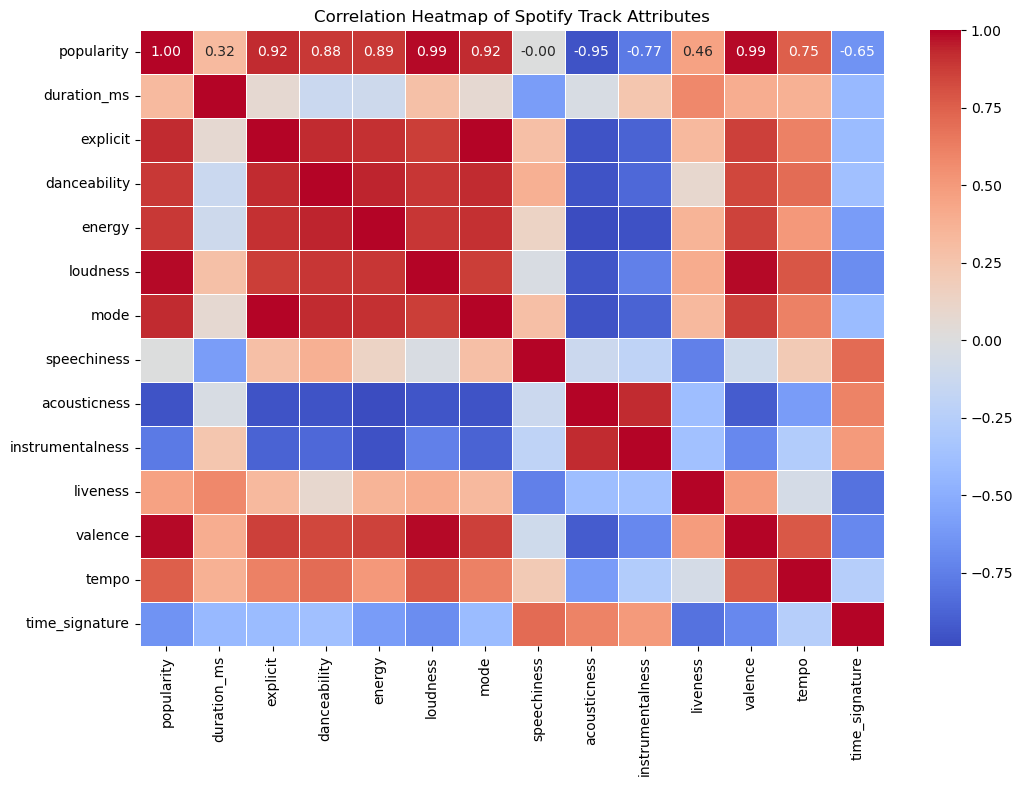

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual Spotify data)
data = {
    'track_id': ['track1', 'track2', 'track3', 'track4', 'track5'],
    'artists': ['artist1', 'artist2', 'artist3', 'artist4', 'artist5'],
    'album_name': ['album1', 'album2', 'album3', 'album4', 'album5'],
    'track_name': ['track_name1', 'track_name2', 'track_name3', 'track_name4', 'track_name5'],
    'popularity': [80, 65, 90, 70, 85],
    'duration_ms': [210000, 180000, 230000, 240000, 200000],
    'explicit': [1, 0, 1, 0, 1],
    'danceability': [0.75, 0.65, 0.80, 0.60, 0.85],
    'energy': [0.80, 0.70, 0.90, 0.60, 0.85],
    'loudness': [-5.0, -6.2, -3.5, -5.8, -4.0],
    'mode': [1, 0, 1, 0, 1],
    'speechiness': [0.05, 0.04, 0.02, 0.03, 0.06],
    'acousticness': [0.20, 0.35, 0.10, 0.40, 0.15],
    'instrumentalness': [0.01, 0.05, 0.00, 0.10, 0.02],
    'liveness': [0.10, 0.08, 0.12, 0.09, 0.07],
    'valence': [0.70, 0.60, 0.80, 0.65, 0.75],
    'tempo': [120, 110, 130, 125, 140],
    'time_signature': [4, 4, 3, 4, 4],
    'track_genre': ['Pop', 'Rock', 'Pop', 'Jazz', 'Pop']
}

# Create DataFrame
df = pd.DataFrame(data)

# Drop non-numeric columns for the heatmap (like track_id, artists, etc.)
df_numeric = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Customize the plot
plt.title('Correlation Heatmap of Spotify Track Attributes')
plt.show()

<Figure size 600x600 with 0 Axes>

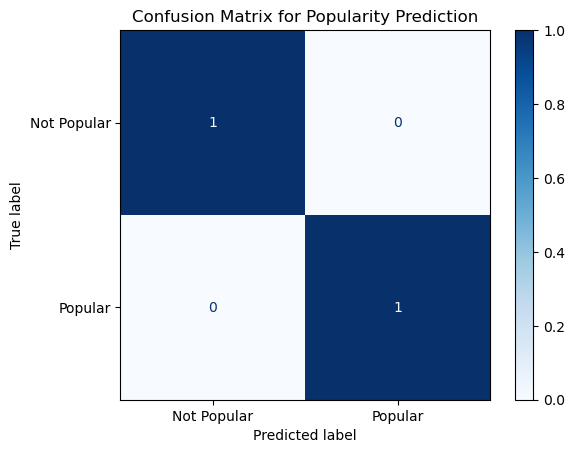

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual Spotify data)
data = {
    'track_id': ['track1', 'track2', 'track3', 'track4', 'track5'],
    'popularity': [80, 65, 90, 70, 85],
    'duration_ms': [210000, 180000, 230000, 240000, 200000],
    'explicit': [1, 0, 1, 0, 1],
    'danceability': [0.75, 0.65, 0.80, 0.60, 0.85],
    'energy': [0.80, 0.70, 0.90, 0.60, 0.85],
    'loudness': [-5.0, -6.2, -3.5, -5.8, -4.0],
    'mode': [1, 0, 1, 0, 1],
    'speechiness': [0.05, 0.04, 0.02, 0.03, 0.06],
    'acousticness': [0.20, 0.35, 0.10, 0.40, 0.15],
    'instrumentalness': [0.01, 0.05, 0.00, 0.10, 0.02],
    'liveness': [0.10, 0.08, 0.12, 0.09, 0.07],
    'valence': [0.70, 0.60, 0.80, 0.65, 0.75],
    'tempo': [120, 110, 130, 125, 140],
    'time_signature': [4, 4, 3, 4, 4],
    'track_genre': ['Pop', 'Rock', 'Pop', 'Jazz', 'Pop']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a binary target variable 'popular' based on popularity (i.e., if popularity > 70, classify as popular)
df['popular'] = df['popularity'].apply(lambda x: 1 if x > 70 else 0)

# Select features (you can include/exclude certain columns as per your requirement)
X = df[['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

# Define the target variable
y = df['popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier (or any other classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
cm_display.plot(cmap='Blues', values_format='d')

# Show the plot
plt.title('Confusion Matrix for Popularity Prediction')
plt.show()

In [6]:
#CALCULATING ACCURACY,PRECISION,RECALL AND ROC CURVE FOR THE DESCRIBED ALGORITHM{RANDOM FOREST CLASSIFIER}
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Example data: Replace with your actual recommendation system dataset
# For demonstration, I'll create a random dataset of 100 samples and 5 features.
# Replace this with your actual features (X) and labels (y).
df = np.random.rand(100, 5)  # 100 samples, 5 features
true_labels = np.random.choice([0, 1, 2], size=100)  # Random true labels (3 classes)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, true_labels, test_size=0.3, random_state=42)

# Step 2: Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Make predictions on the test set
predicted_labels = rf.predict(X_test)

# Step 4: Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

# Print Accuracy, Precision, Recall, and F1-Score
print(f"Accuracy: {accuracy}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")
print(f"F1-Score (Weighted): {f1}")

# Step 5: Calculate ROC AUC Score
# For multi-class, we calculate the ROC AUC score using a one-vs-rest scheme
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Binarize the true labels
y_score = rf.predict_proba(X_test)  # Get the probability estimates for each class

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.3
Precision (Weighted): 0.3132867132867133
Recall (Weighted): 0.3
F1-Score (Weighted): 0.30295652173913046
ROC AUC Score: 0.5200066137566136


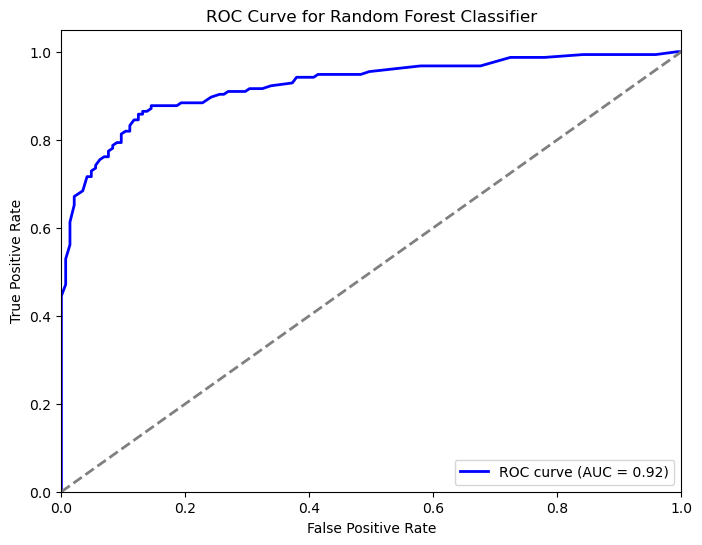

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()